# Keras Tutorial

In [2]:
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Activation 
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam

% matplotlib inline
import matplotlib.pyplot as plt

## 1. Regressor

### (1)	建立model

A.先建立Model: Model =Sequential()

Model.add(layer1)

Model.add(layer2)…
 
B.先建立input: X=Input(input_shape)

X=layer1()(X)

X=layer2()(X)

再建立model: model = Model(inputs=…, outputs=…)
 
### (2)	model使用
Model.compile

Model.fit

Model.evaluate

Model.predict

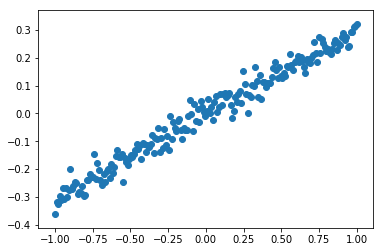

In [8]:
# Create data
X = np.linspace(-1,1,200)
np.random.shuffle(X)
Y = 0.3*X + np.random.normal(0, 0.03, (200,))

plt.scatter(X,Y)
plt.show

X_train, Y_train = X[:160], Y[:160]
X_test, Y_test = X[160:], Y[160:]

In [9]:
# Create Model
model = Sequential()
model.add(Dense(1, input_dim=1))

In [10]:
# Use Model
model.compile(loss='mse', optimizer='sgd')
for step in range(300):
    cost = model.train_on_batch(X_train,Y_train)
    if step % 10 is 0:
        print('train cost:' + str(cost))

train cost:0.013473714
train cost:0.011860834
train cost:0.010454584
train cost:0.009228298
train cost:0.0081588235
train cost:0.00722603
train cost:0.0064123897
train cost:0.0057026464
train cost:0.0050835083
train cost:0.004543395
train cost:0.0040722066
train cost:0.00366114
train cost:0.003302522
train cost:0.0029896535
train cost:0.0027166982
train cost:0.0024785623
train cost:0.0022708024
train cost:0.0020895428
train cost:0.001931404
train cost:0.0017934369
train cost:0.0016730672
train cost:0.0015680507
train cost:0.0014764288
train cost:0.001396493
train cost:0.0013267549
train cost:0.0012659107
train cost:0.0012128268
train cost:0.0011665139
train cost:0.0011261076
train cost:0.0010908548


In [11]:
cost = model.evaluate(X_test, Y_test, batch_size = 40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights:', W, 'Bias', b)

40/40 [==============================] - 0s 468us/step
test cost: 0.0011515626683831215
Weights: [[0.27801573]] Bias [-0.00054361]


<function matplotlib.pyplot.show(*args, **kw)>

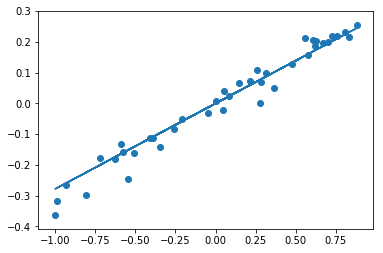

In [12]:
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show

## 2. Classifier

In [13]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print('X_train=',X_train.shape)
print('Y_train=',Y_train.shape)
print('X_test=',X_test.shape)
print('Y_test=',Y_test.shape)

X_train= (60000, 28, 28)
Y_train= (60000,)
X_test= (10000, 28, 28)
Y_test= (10000,)


In [14]:
X_train = X_train.reshape(X_train.shape[0], -1) / 255.   # normalize
X_test = X_test.reshape(X_test.shape[0], -1) / 255.      # normalize
Y_train = np_utils.to_categorical(Y_train, num_classes=10)
Y_test = np_utils.to_categorical(Y_test, num_classes=10)

In [15]:
model = Sequential()
model.add(Dense(32, input_dim=784, activation='relu'))
model.add(Dense(10, input_dim=32, activation='softmax'))

In [16]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

In [17]:
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(X_train, Y_train, epochs=2, batch_size=32)

Epoch 1/2
60000/60000 [==============================] - 2s 37us/step - loss: 0.3644 - acc: 0.8974
Epoch 2/2
60000/60000 [==============================] - 2s 32us/step - loss: 0.1946 - acc: 0.9441


In [19]:
loss, accuracy=model.evaluate(X_test, Y_test)
print('test loss:', loss)
print('accuracy', accuracy)

10000/10000 [==============================] - 0s 18us/step
test loss: 0.17074313362017274
accuracy 0.9509


## 3. CNN

In [26]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print('X_train=',X_train.shape)
print('Y_train=',Y_train.shape)
print('X_test=',X_test.shape)
print('Y_test=',Y_test.shape)

X_train= (60000, 28, 28)
Y_train= (60000,)
X_test= (10000, 28, 28)
Y_test= (10000,)


In [32]:
input_shape=(28,28,1)
X_input = Input(input_shape)
X = Conv2D(filters=32, kernel_size=5, strides=1, padding='same')(X_input)
X = Activation('relu')(X)
X = MaxPooling2D(pool_size=2, strides=2, padding='same')(X)
X = Conv2D(filters=64, kernel_size=5, strides=1, padding='same')(X)
X = Activation('relu')(X)
X = MaxPooling2D(pool_size=2, strides=2, padding='same')(X)
X = Flatten()(X)
X = Dense(1024, activation='relu')(X)
X = Dense(10, activation='softmax')(X)
model = Model(inputs=X_input, outputs=X, name='CNN_model')

In [33]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

In [34]:
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy', 'mae'])

In [35]:
X_train = X_train.reshape(-1, 28, 28, 1)/255
X_test = X_test.reshape(-1, 28, 28, 1)/255
Y_train = np_utils.to_categorical(Y_train, num_classes=10)
Y_test = np_utils.to_categorical(Y_test, num_classes=10)

In [36]:
model.fit(X_train,Y_train,epochs=1,batch_size=16)

Epoch 1/1
60000/60000 [==============================] - 225s 4ms/step - loss: 2.3016 - acc: 0.1110 - mean_absolute_error: 0.1800
